In [11]:
import pandas as pd
import numpy as np

from mpl_interactions import ioff, panhandler, zoom_factory
import matplotlib.pyplot as plt
#%matplotlib widget

--------

# Learning rate

Import the results of hyperparameter tuning

In [2]:
best_params = pd.read_csv('best_params_lr_H.csv')
best_params = pd.DataFrame(best_params)
best_params_lr = best_params[['wasserstein_1d','config/gan/generator_lr','config/gan/discriminator_lr']]
best_params_lr.sort_values('wasserstein_1d')

,wasserstein_1d,config/gan/generator_lr,config/gan/discriminator_lr
878,-5.111186e+06,0.000012,0.049242
766,-2.730057e+05,0.000018,0.039263
480,-1.400612e+05,0.000021,0.037593
312,-9.755055e+04,0.000020,0.037123
70,-4.618233e+04,0.000032,0.035459
...,...,...,...
697,-1.237210e+00,0.000498,0.000105
344,-1.236244e+00,0.000029,0.002016
635,-1.234720e+00,0.000826,0.002310
161,-1.217626e+00,0.000033,0.004453


Take a look at the loss metric (we apply log(-x) transformation)

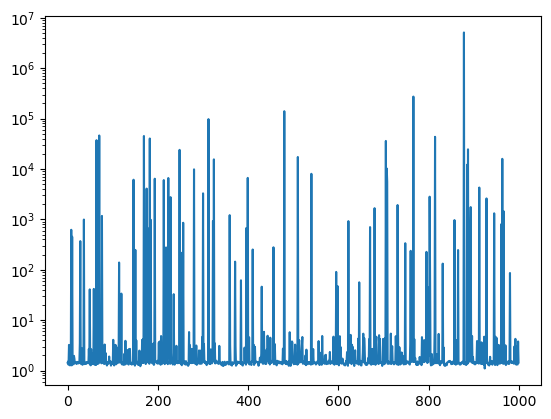

In [3]:
wass1d = best_params_lr['wasserstein_1d']

plt.plot(-wass1d)
plt.yscale('log')

We consider only points corresponding to loss metric lower than 10^{-4}

In [4]:
df = best_params_lr.loc[best_params_lr['wasserstein_1d'] < -1e+4]
#df = df.loc[df['wasserstein_1d'] > -1e9]

df.sort_values('wasserstein_1d')

,wasserstein_1d,config/gan/generator_lr,config/gan/discriminator_lr
878,-5.111186e+06,0.000012,0.049242
766,-2.730057e+05,0.000018,0.039263
480,-1.400612e+05,0.000021,0.037593
312,-9.755055e+04,0.000020,0.037123
70,-4.618233e+04,0.000032,0.035459
169,-4.509625e+04,0.000034,0.035748
814,-4.347074e+04,0.000057,0.038441
182,-4.023328e+04,0.000011,0.034379
64,-3.726610e+04,0.000039,0.035002
705,-3.597337e+04,0.000013,0.038715


Plot the points: yellow points corresponds to low loss metric

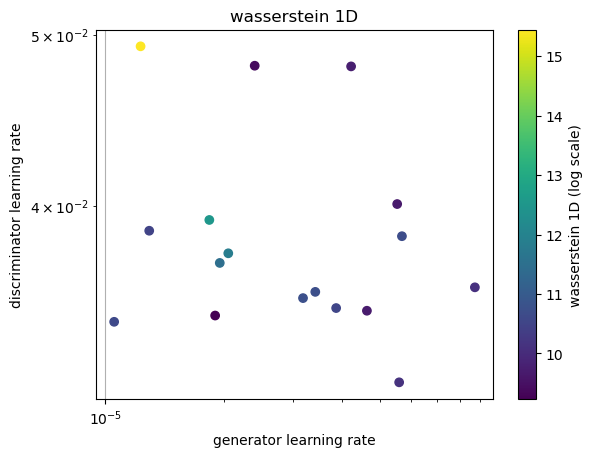

In [5]:
gen_lr = df['config/gan/generator_lr']
dis_lr = df['config/gan/discriminator_lr']
y = np.log(-df['wasserstein_1d'])

plt.scatter(gen_lr, dis_lr, c=y, cmap='viridis')  # You can change the colormap as per your preference
plt.colorbar(label='wasserstein 1D (log scale)')  # Adding color bar to indicate dependent variable
plt.xlabel('generator learning rate')
plt.ylabel('discriminator learning rate')
plt.title('wasserstein 1D')
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.show()

Low values of generator_learning_rate are better. 
High values of discriminator_learning_rate are fine.

Let us zoom in the upper-left portion of the graph.

In [6]:
df = df.loc[df['config/gan/generator_lr'] < 1e-4]
df = df.loc[df['config/gan/discriminator_lr'] > 9.6e-2]

gen_lr = df['config/gan/generator_lr']
dis_lr = df['config/gan/discriminator_lr']
y = np.log(-df['wasserstein_1d'])

plt.scatter(gen_lr, dis_lr, c=y, cmap='viridis')  # You can change the colormap as per your preference
plt.colorbar(label='wasserstein 1D (log scale)')  # Adding color bar to indicate dependent variable
plt.xlabel('generator learning rate')
plt.ylabel('discriminator learning rate')
plt.title('wasserstein 1D')
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 640x480 with 2 Axes>

We choose the yellow point for the optimal generator and discriminator learning rates.

In [7]:
df.sort_values('wasserstein_1d').iloc[0]

IndexError: single positional indexer is out-of-bounds

In [ ]:
best_generator_lr, best_discriminator_lr = df.sort_values('wasserstein_1d').iloc[0][['config/gan/generator_lr','config/gan/discriminator_lr']]
best_generator_lr, best_discriminator_lr

(1.1284848297057308e-05, 0.0996627458492582)

(1.1284848297057308e-05, 0.0996627458492582)

_______

# Batch size

In [8]:
best_params = pd.read_csv('best_params_batch_size.csv')
best_params = pd.DataFrame(best_params)
best_params_bs = best_params[['wasserstein_1d','config/custom/batch_size']]
best_params_bs.sort_values('wasserstein_1d')

,wasserstein_1d,config/custom/batch_size
490,-1171.020793,128
495,-1160.108317,128
324,-1157.714722,128
31,-1143.119336,64
273,-1141.322437,64
...,...,...
370,-913.878988,128
462,-913.284871,128
179,-907.137854,64
359,-897.912292,128


<Axes: xlabel='config/custom/batch_size', ylabel='wasserstein_1d'>

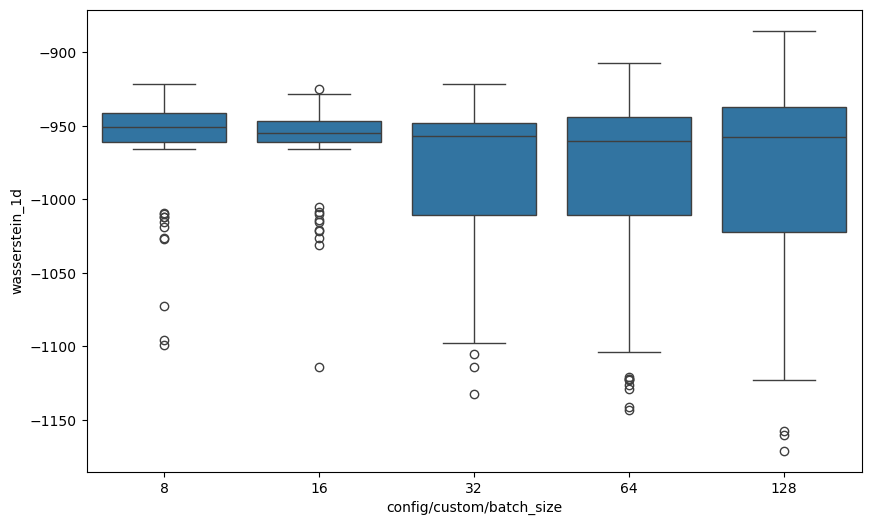

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=best_params_bs, x='config/custom/batch_size', y='wasserstein_1d')

-----

# Batch size and learning rate

In [54]:
best_params = pd.read_csv('best_params_lr_bs.csv')
best_params = pd.DataFrame(best_params)
best_params_lr_bs = best_params[['wasserstein_1d','config/custom/batch_size','config/gan/generator_lr','config/gan/discriminator_lr']]
best_params_lr_bs.sort_values('wasserstein_1d')

,wasserstein_1d,config/custom/batch_size,config/gan/generator_lr,config/gan/discriminator_lr
1414,-2.409475e+33,8,0.000004,0.835149
1172,-1.606740e+33,16,0.000002,0.842289
896,-1.150704e+33,128,0.000001,0.984906
579,-8.824899e+32,32,0.000001,0.606568
3554,-6.776741e+32,16,0.000002,0.995289
...,...,...,...,...
4044,1.409967e+15,16,0.000001,0.468860
1764,4.256348e+15,16,0.000001,0.664928
1107,6.652338e+15,8,0.000002,0.715699
1877,7.574873e+15,8,0.000007,0.999634


In [55]:
best_params_lr_bs['log-wass1d'] = np.log10(-best_params_lr_bs['wasserstein_1d'])

/Users/nicolafraccarolo/miniforge3/envs/ml-env/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/0j/6dcms_yx1kxf_7qchx7x4vf40000gn/T/ipykernel_25667/883389253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_params_lr_bs['log-wass1d'] = np.log10(-best_params_lr_bs['wasserstein_1d'])


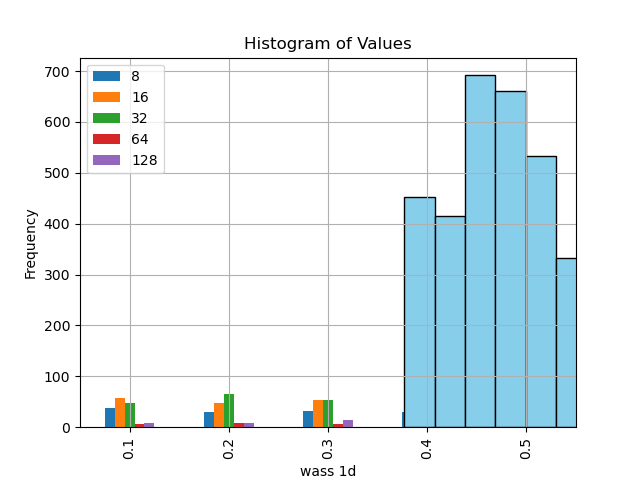

In [56]:
plt.hist(best_params_lr_bs['log-wass1d'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('wass 1d')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

In [57]:
best_params_lr_bs.loc[best_params_lr_bs['wasserstein_1d'] >= -1e+7]

,wasserstein_1d,config/custom/batch_size,config/gan/generator_lr,config/gan/discriminator_lr,log-wass1d
0,-1.120474e+03,32,0.000010,0.001000,3.049402
1,-1.212840e+03,128,0.000010,0.001536,3.083804
2,-9.092642e+02,32,0.000002,0.000312,2.958690
3,-9.273460e+02,32,0.000002,0.000332,2.967242
4,-4.763102e+06,16,0.000012,0.018093,6.677890
...,...,...,...,...,...
4992,-8.220680e+02,16,0.080647,0.625157,2.914908
4994,-1.453566e+04,32,0.000001,0.720664,4.162435
4996,-8.627230e+03,16,0.000003,0.583617,3.935871
4997,-7.828013e+02,32,0.507225,0.843458,2.893652


<Axes: xlabel='config/custom/batch_size', ylabel='wasserstein_1d'>

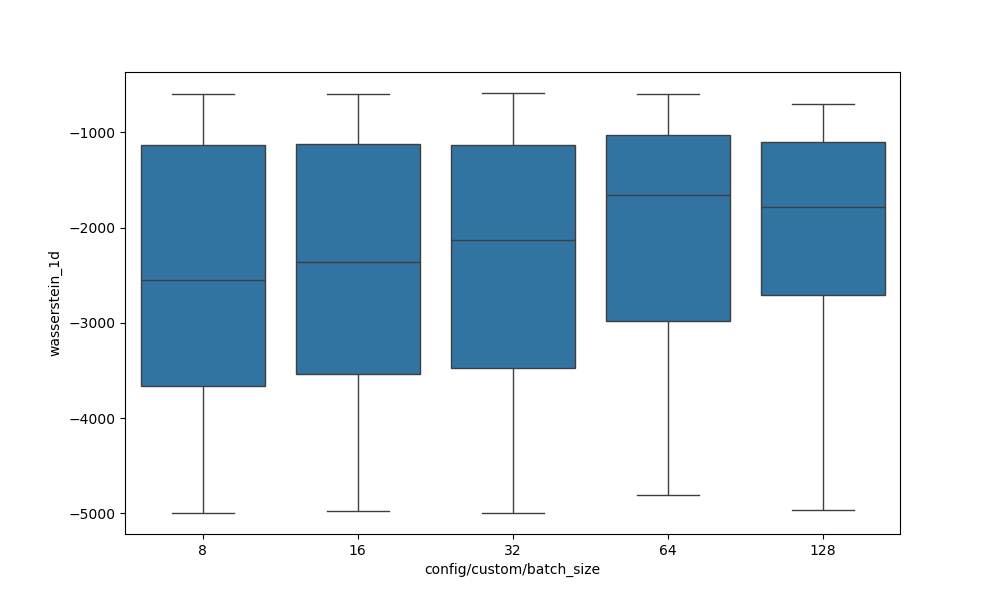

In [58]:
import seaborn as sns

data = best_params_lr_bs.loc[best_params_lr_bs['wasserstein_1d'] >= -0.5e+4]
data = data.loc[data['wasserstein_1d'] <= 0]

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='config/custom/batch_size', y='wasserstein_1d')
# plt.figure(figsize=(10,6))
# sns.boxplot(data=data, x='config/custom/batch_size', y='log-wass1d')

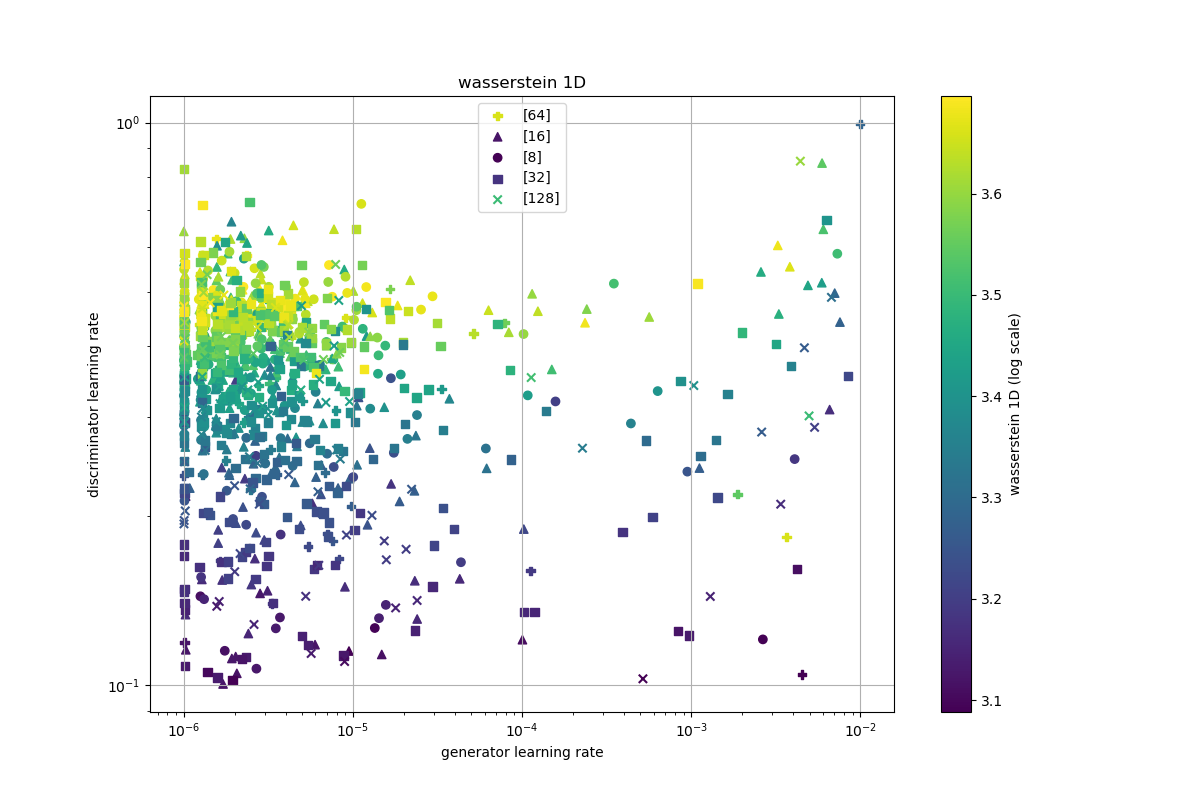

In [59]:
#gen_lr = data['config/gan/generator_lr']
#dis_lr = data['config/gan/discriminator_lr']
#y = np.log(-data['wasserstein_1d'])
#colors_dict

df = data
df = df.loc[df['config/gan/discriminator_lr'] > 0.1]
df = df.loc[df['config/gan/generator_lr'] < 0.01]

markers_dict = {8: 'o', 16: '^', 32: 's', 64: 'P', 128: 'x'}
df['marker'] = df.apply(lambda x: markers_dict[x['config/custom/batch_size']], axis=1)
#data['color'] = data.apply(lambda x: )

plt.figure(figsize=(12,8))
for marker, d in df.groupby('marker'):
    plt.scatter(x=d['config/gan/generator_lr'], 
                y=d['config/gan/discriminator_lr'], 
                c=np.log10(-d['wasserstein_1d']),
                marker=marker, 
                cmap='viridis', 
                label=d['config/custom/batch_size'].unique())
plt.legend()
#plt.scatter(gen_lr, dis_lr, c=y, cmap='viridis')  # You can change the colormap as per your preference
plt.colorbar(label='wasserstein 1D (log scale)')  # Adding color bar to indicate dependent variable
plt.xlabel('generator learning rate')
plt.ylabel('discriminator learning rate')
plt.title('wasserstein 1D')
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.show()

/var/folders/0j/6dcms_yx1kxf_7qchx7x4vf40000gn/T/ipykernel_25667/1342097941.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


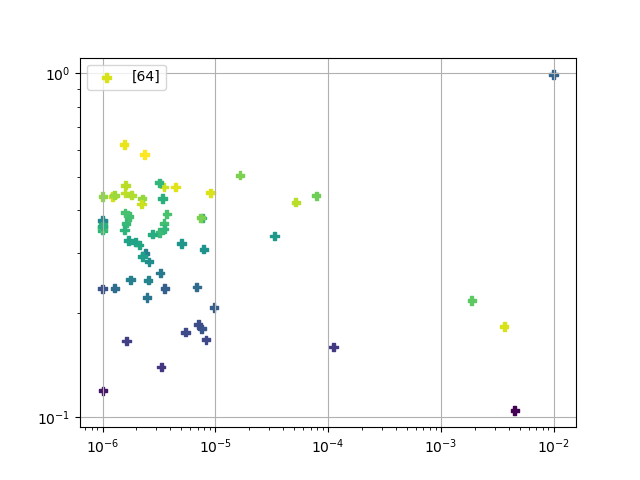

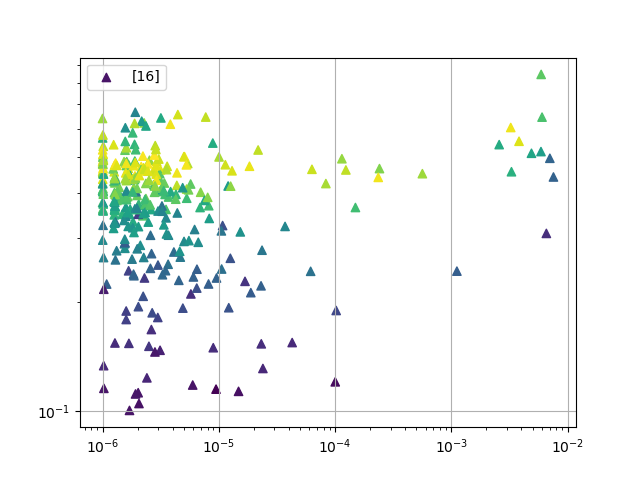

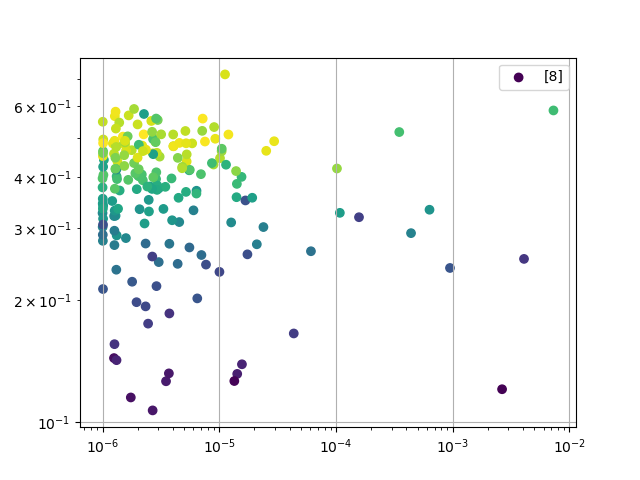

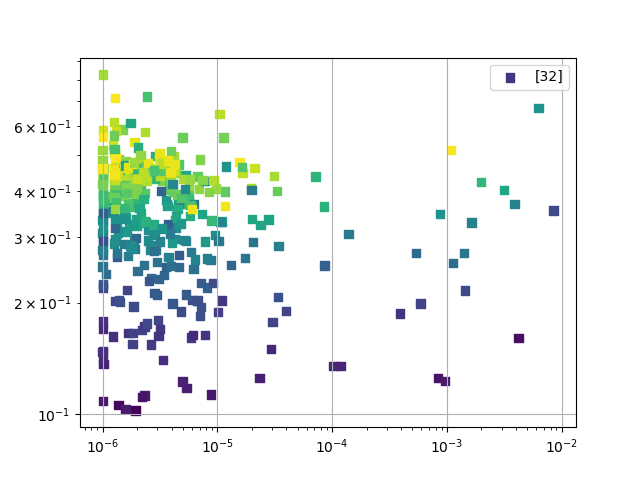

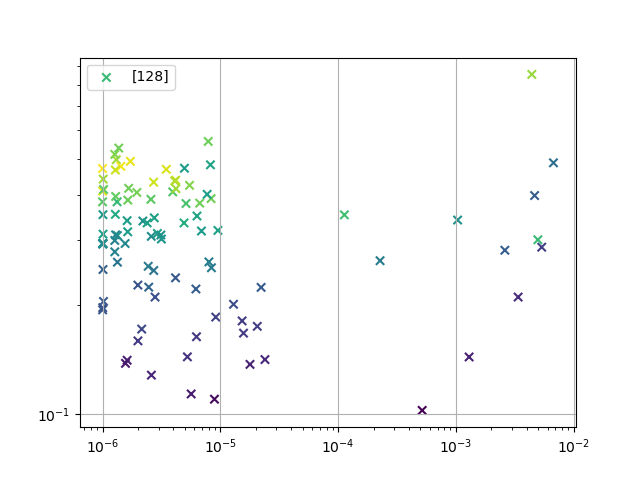

In [14]:
for marker, d in df.groupby('marker'):
    plt.figure()
    plt.scatter(x=d['config/gan/generator_lr'], 
                y=d['config/gan/discriminator_lr'], 
                c=np.log10(-d['wasserstein_1d']),
                marker=marker, 
                cmap='viridis', 
                label=d['config/custom/batch_size'].unique())
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

<Axes: >

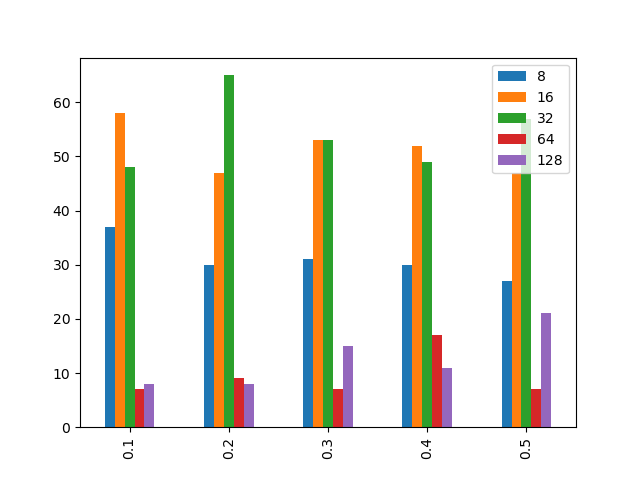

In [60]:
df = data

batch_size_idx = df['config/custom/batch_size'].sort_values().unique()
df2 = pd.DataFrame(index=batch_size_idx)

for p in [0.1, 0.2, 0.3, 0.4, 0.5]:
    df2[str(p)] = df.sort_values('wasserstein_1d').iloc[int(len(df) * (p-0.1)) : int(len(df) * p)].groupby('config/custom/batch_size').count()['wasserstein_1d'].values

df2.transpose().plot.bar()

--------

# Architecture

In [12]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [13]:
#best_params = pd.read_csv('best_params_architecture.csv')
best_params = pd.read_csv('best_params_architecture_SUD_v4.csv')
best_params = pd.DataFrame(best_params)

params = [
    "config/gan/initial_noise_size",
    "config/gan/noise_size",
    "config/gan/hidden_size",
    "config/gan/mlp_size"
]

best_params_lr_bs = best_params[flatten([['wasserstein_1d'], params])]
best_params_lr_bs.sort_values('wasserstein_1d')

,wasserstein_1d,config/gan/initial_noise_size,config/gan/noise_size,config/gan/hidden_size,config/gan/mlp_size
4668,-6.933291,5,9,22,31
1393,-4.052642,5,9,21,29
1144,-3.351801,9,6,31,31
1766,-3.318845,8,7,19,29
3510,-2.939444,8,7,23,29
...,...,...,...,...,...
1593,0.486426,7,9,21,30
629,0.489536,9,9,24,30
3451,0.535210,7,3,20,29
1338,0.544113,7,9,22,29


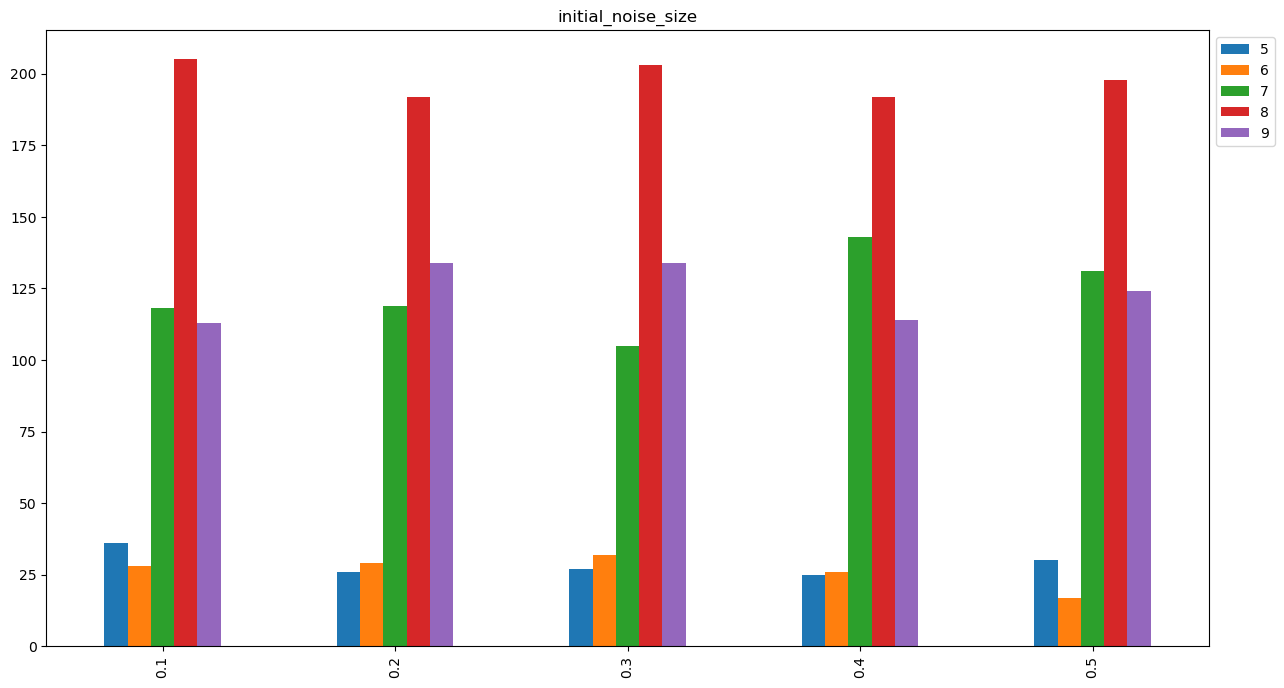

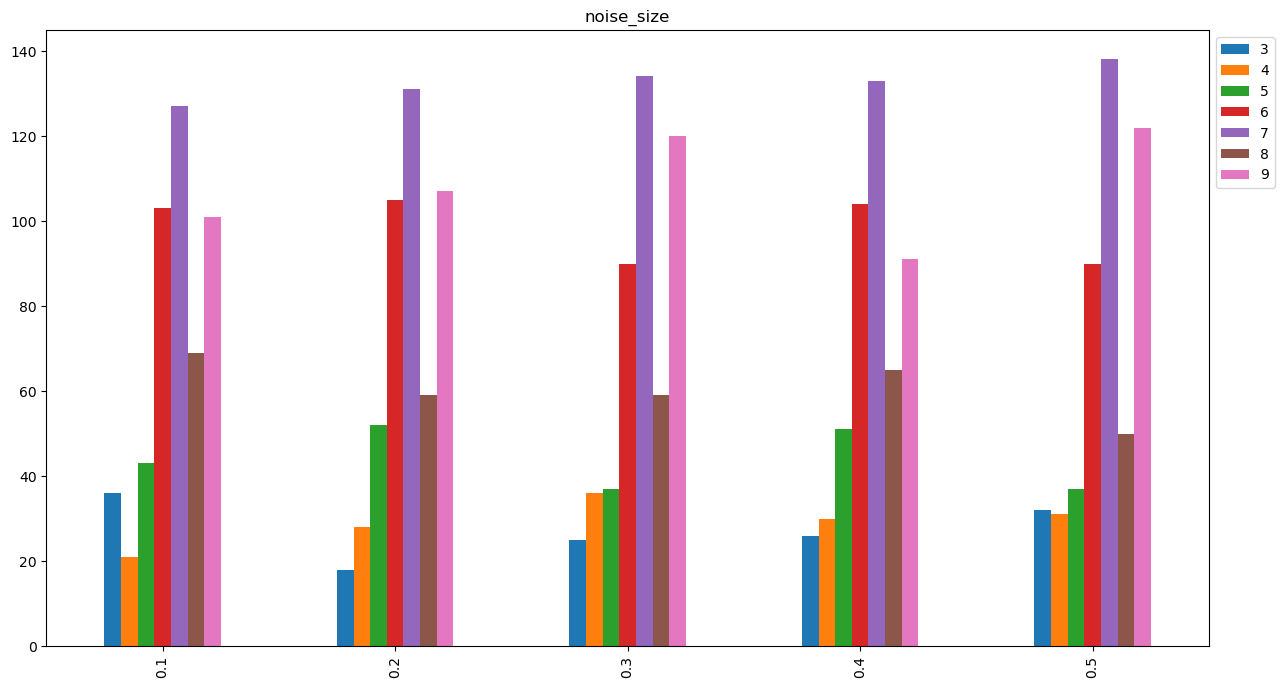

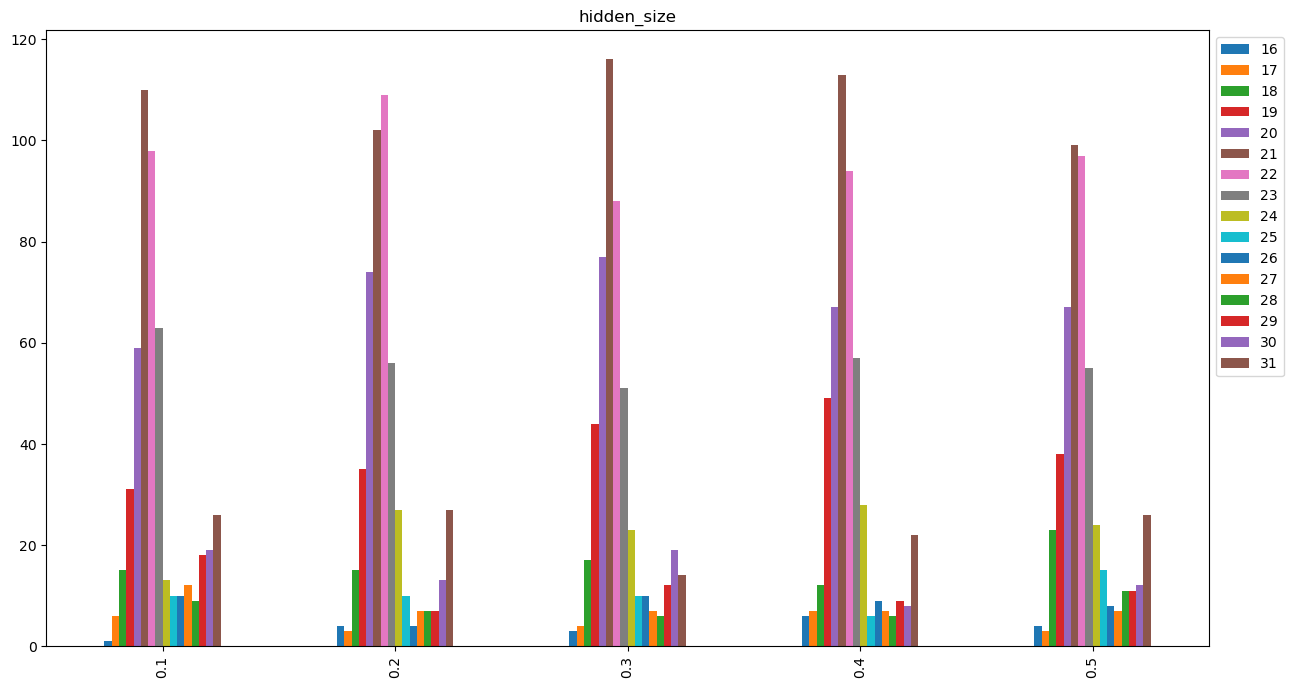

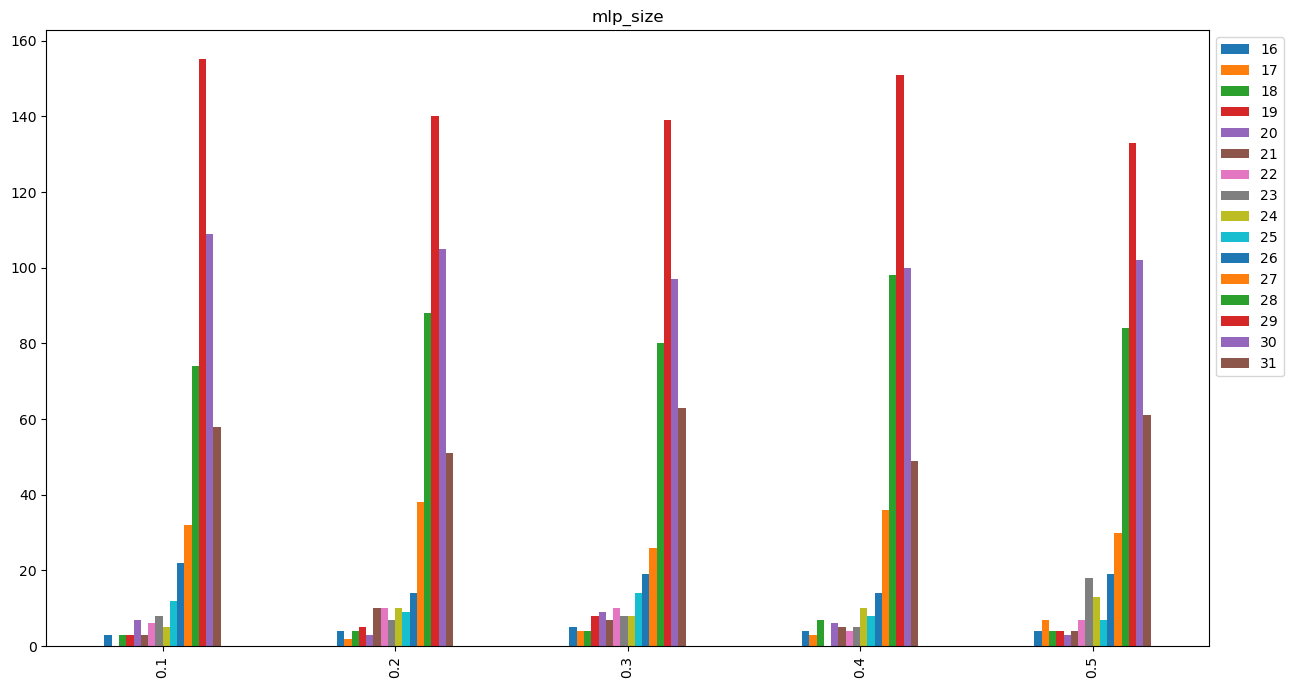

In [14]:
df = best_params

for par in params:
#for par in ['config/gan/hidden_size']:
    par_idx = df[par].sort_values().unique()
    df2 = pd.DataFrame(index=par_idx)

    for p in [0.1, 0.2, 0.3, 0.4, 0.5]:
        s = df.sort_values('wasserstein_1d').iloc[int(len(df) * (p-0.1)) : int(len(df) * p)].groupby(par).count()['wasserstein_1d']#.values
        df2 = df2.join(s.rename(p))

    par_name = par.split("/")[-1]
    fig, ax = plt.subplots(figsize=(15,8))
    df2.transpose().plot.bar(ax=ax)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(par_name)
    plt.savefig(f'{par_name}.png')
    plt.show()